<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [1]:
import pandas as pd

Load the dataset into a dataframe.


In [2]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


In [3]:
# your code goes here
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Plot the distribution curve for the column `ConvertedComp`.

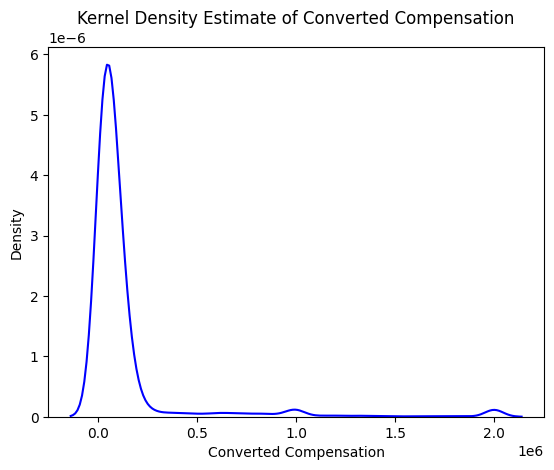

In [14]:

# Use displot
sns.kdeplot(df['ConvertedComp'], color='blue')
plt.title('Kernel Density Estimate of Converted Compensation')
plt.xlabel('Converted Compensation')
plt.ylabel('Density')
plt.show()

Plot the histogram for the column `ConvertedComp`.


<Axes: ylabel='Frequency'>

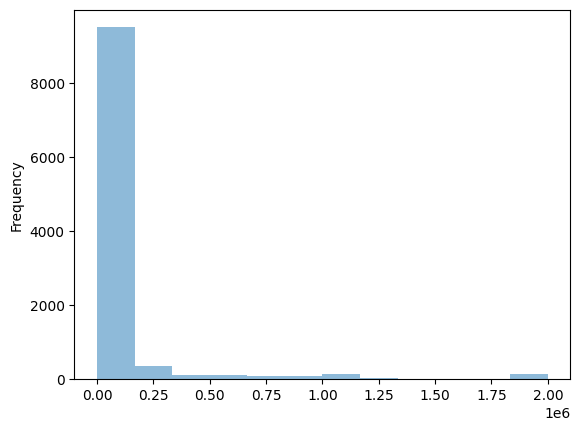

In [15]:
# your code goes here
df['ConvertedComp'].plot.hist(bins=12, alpha=0.5)

What is the median of the column `ConvertedComp`?


In [16]:
# your code goes here
print('median ConvertedComp is',df['ConvertedComp'].median())
print('median Age is',df['Age'].median())

median ConvertedComp is 57745.0
median Age is 29.0


How many responders identified themselves only as a **Man**?


In [19]:
# your code goes here
print('\n', df['Gender'].eq('Man').sum(), 'respondents identify as "Man"')


 10480 respondents identify as "Man"


Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [21]:
# your code goes here
# Filter the DataFrame for respondents who identified as only a woman
woman_df = df[df['Gender'] == 'Woman']

# Calculate the median ConvertedComp for women
median_woman_comp = woman_df['ConvertedComp'].median()

# Print the result
print(f"Median ConvertedComp for respondents identified as only a Woman: {median_woman_comp}")

Median ConvertedComp for respondents identified as only a Woman: 57708.0


Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [22]:
# your code goes here
df['Age'].describe()

count    11111.000000
mean        30.778895
std          7.393686
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64

Plot a histogram of the column `Age`.


median Age is 29.0


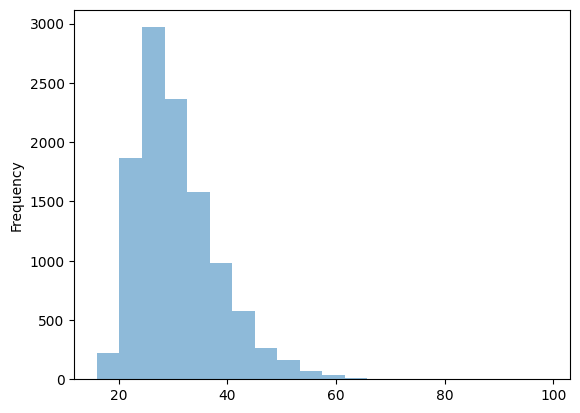

In [56]:
# your code goes here
df['Age'].plot.hist(bins=20, alpha=0.5)
print('median Age is',df['Age'].median())

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


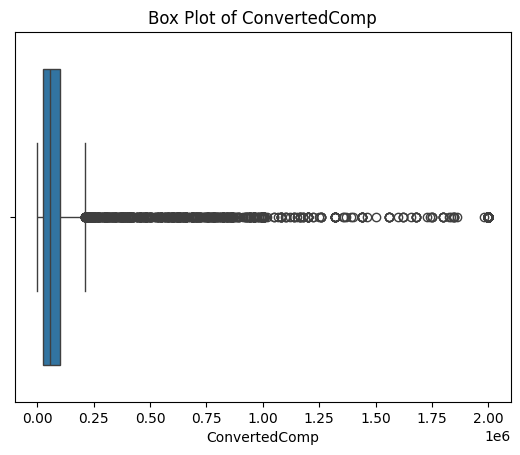

In [27]:
# your code goes here
sns.boxplot(x=df['ConvertedComp'])
plt.title('Box Plot of ConvertedComp')
plt.show()

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [32]:
# your code goes here
Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)
IQR = Q3 - Q1
print('The middle quartiles for ConvertedComp range from',Q1, 'to',Q3,'. The interquartile range is',IQR)

The middle quartiles for ConvertedComp range from 26868.0 to 100000.0 . The interquartile range is 73132.0


Find out the upper and lower bounds.


In [33]:
# your code goes here
Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Lower bound is: {lower_bound} and Upper bound is: {upper_bound}")

Lower bound is: -82830.0 and Upper bound is: 209698.0


Identify how many outliers are there in the `ConvertedComp` column.


In [42]:
df[(df['ConvertedComp'] > upper_bound) | (df ['ConvertedComp'] < lower_bound)].shape

(879, 85)

Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [61]:
# your code goes here
df_cleaned = df[df.ConvertedComp <= upper_bound]
df_cleaned.ConvertedComp.describe()



count      9703.000000
mean      59883.208389
std       43394.336755
min           0.000000
25%       24060.000000
50%       52704.000000
75%       85574.500000
max      209356.000000
Name: ConvertedComp, dtype: float64

In [62]:
median_no_outliers = df_no_outliers['ConvertedComp'].median()

# Print the result
print(f"Median ConvertedComp after removing outliers: {median_no_outliers}")


Median ConvertedComp after removing outliers: 52704.0


In [63]:
# Identify outliers below Q1
outliers_below_Q1 = df[df['Age'] < lower_bound]

# Count the number of outliers below Q1
num_outliers_below_Q1 = len(outliers_below_Q1)

# Print the result
print(f"Number of outliers below Q1 in the 'Age' column: {num_outliers_below_Q1}")

Number of outliers below Q1 in the 'Age' column: 0


In [64]:
# Assuming `df_no_outliers` is your DataFrame without outliers
mean_no_outliers = df_no_outliers['ConvertedComp'].mean()

# Print the result
print(f"Mean ConvertedComp after removing outliers: {mean_no_outliers}")

Mean ConvertedComp after removing outliers: 59883.20838915799


## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [55]:
# your code goes here

df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

# Identify numeric columns for correlation calculation
numeric_columns = df.select_dtypes(include=['number']).columns

# Calculate the correlation between 'Age' and all other numerical columns
age_correlation = df[numeric_columns].corr()['Age']

# Print the result
print(age_correlation)

Respondent       0.004041
CompTotal        0.006970
ConvertedComp    0.105386
WorkWeekHrs      0.036518
CodeRevHrs      -0.020469
Age              1.000000
Name: Age, dtype: float64


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
